# Advanced business analytics - Exploratory notebook

Import packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
from matplotlib import cm
from PIL import Image
import os
import PIL
import glob
tqdm.pandas()
df = pd.read_csv("Data/articles_data.csv")
df=df.drop("Unnamed: 0",axis=1)
df=df.dropna()

In [2]:
df.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
6,reuters,Reuters,Reuters Editorial,EU wants to see if lawmakers will block Brexit...,The European Union is waiting to see if Britis...,https://www.reuters.com/article/us-britain-eu-...,https://s2.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:25:41Z,LONDON (Reuters) - The European Union is waiti...,0.0,0.0,0.0,817.0,0.0
7,reuters,Reuters,Reuters Editorial,European third quarter profit outlook improves...,Earnings and revenue expectations for European...,https://www.reuters.com/article/us-europe-stoc...,https://s2.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:53:48Z,LONDON (Reuters) - Earnings and revenue expect...,0.0,0.0,0.0,0.0,0.0


Overview of attributes, data types and number of NAN values

# Image_Scrape

In [3]:
import re
front="/images/"
front2="/image/"
end="-"
Front_url="https://i.insider.com/"

new_urls=[]

for i in range(len(df)):
    if df.source_id.iloc[i]=="business-insider":
        try:
                if df.iloc[i].url_to_image[0:11]=="https://amp":
                    id_name=re.search(f'{front}(.*)', df.iloc[i].url_to_image.split("-")[0]).group(1)
                    full_url = Front_url+id_name
                    new_urls.append(full_url)

                else:
                    id_name=re.search(f'{front2}(.*)', df.iloc[i].url_to_image.split("-")[0]).group(1)
                    full_url = Front_url+id_name
                    new_urls.append(full_url)
        except:
            new_urls.append(df.iloc[i].url_to_image)
    else: new_urls.append(df.iloc[i].url_to_image)

In [4]:
#new_urls = [x.replace("https://","") for x in new_urls]
#new_urls = [x.replace("//","") for x in new_urls]
df['url_to_image_real']=new_urls

In [5]:
urls=[x for x in df.url_to_image_real]
index=[x for x in df.index]

In [6]:
import time
def im_scrape(urls,filename):
    call = requests.get(urls)
    if str(call)=="<Response [200]>":
        img_data = call.content
        with open(f'images/{filename}.png', 'wb') as handler:
             handler.write(img_data)
        #time.sleep(2) 
        image=Image.open(f"images/{filename}.png")
        resized_image = image.resize((128,128))
        resized_image.save(f'images/{filename}.png')
        
    else:
        print(urls)

In [19]:
len(urls)
index.index(6564)

4803

In [21]:
for i in range(index.index(6565),len(urls)):
    try:
        im_scrape(urls[i],index[i])
    except:
        print(urls[i])

https://www.irishtimes.com/image-creator/?id=1.4036177&origw=1440
https://www.irishtimes.com/image-creator/?id=1.4036386&origw=1440
https://s.abcnews.com/images/Health/trump-autism-bill-ht-jt-191002_hpMain_16x9_992.jpg
https://a1.espncdn.com/combiner/i?img=%2Fmedia%2Fmotion%2F2019%2F1002%2Fdm_191002_gardner_minshew%2Fdm_191002_gardner_minshew.jpg
https://www.irishtimes.com/image-creator/?id=1.4037642&origw=1440
https://www.irishtimes.com/image-creator/?id=1.4038725&origw=1058
https://www.irishtimes.com/image-creator/?id=1.4038841&origw=1440
https://www.irishtimes.com/image-creator/?id=1.4038955&origw=1440
https://www.irishtimes.com/image-creator/?id=1.4039311&origw=1440
https://www.irishtimes.com/image-creator/?id=1.4039320&origw=1440


Text preview længde 250 characters hvis ikke tilfør dummy ord

In [66]:
requests.get(urls[0])

<Response [200]>

### Basic exploration of the data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7604 entries, 0 to 10433
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        7604 non-null   object 
 1   source_name                      7604 non-null   object 
 2   author                           7604 non-null   object 
 3   title                            7604 non-null   object 
 4   description                      7604 non-null   object 
 5   url                              7604 non-null   object 
 6   url_to_image                     7604 non-null   object 
 7   published_at                     7604 non-null   object 
 8   content                          7604 non-null   object 
 9   top_article                      7604 non-null   float64
 10  engagement_reaction_count        7604 non-null   float64
 11  engagement_comment_count         7604 non-null   float64
 12  engagement_share_co

In [4]:
df_dist=df.select_dtypes(exclude=['object'])

We can see that a lot of attributes are missing a smaller percentages of values, therefore we just choose to exclude them since we have over 9000 articles still.

<AxesSubplot:ylabel='Frequency'>

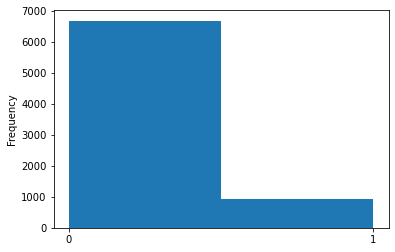

In [5]:
df_dist.top_article.plot(kind="hist",
                         bins=2,
                         xticks=[0,1])

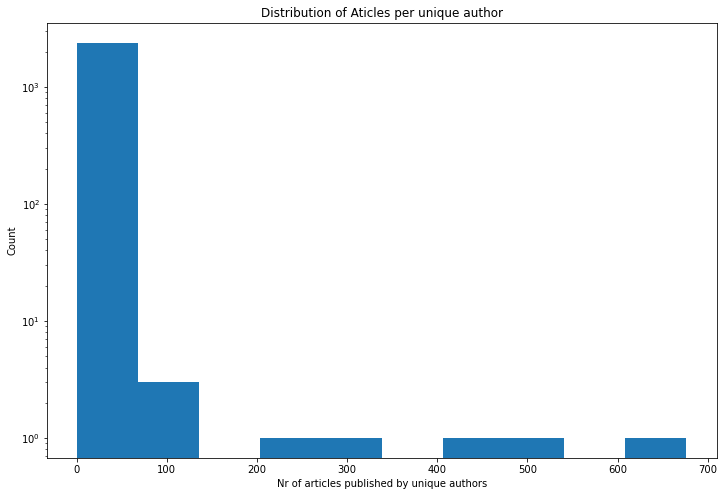

In [6]:
df.author.value_counts().plot(kind="hist",logy=True,
                              title=("Distribution of Aticles per unique author"),figsize=(12,8));
plt.ylabel("Count")
plt.xlabel("Nr of articles published by unique authors")
plt.show()

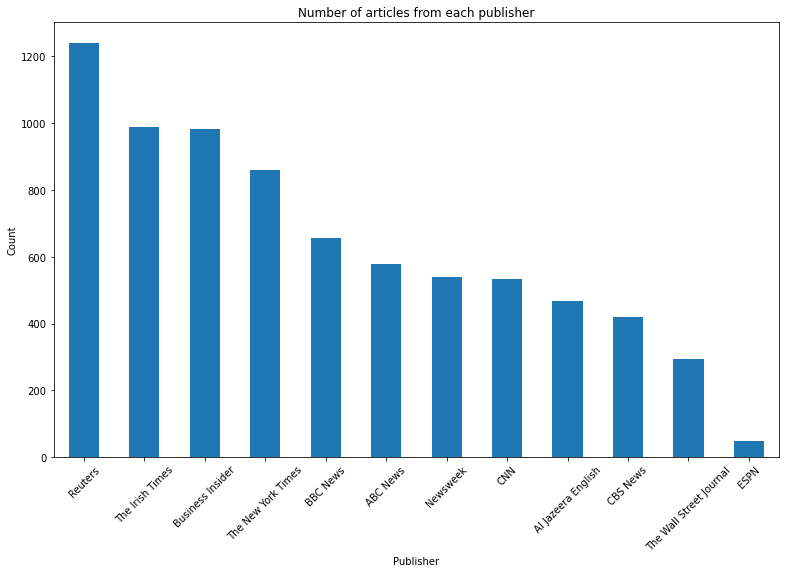

In [7]:
df.source_name.value_counts().plot(kind="bar",
                                   ylabel="Count",
                                   xlabel="Publisher",
                                   title="Number of articles from each publisher",
                                   figsize=(13,8),
                                   rot=45);

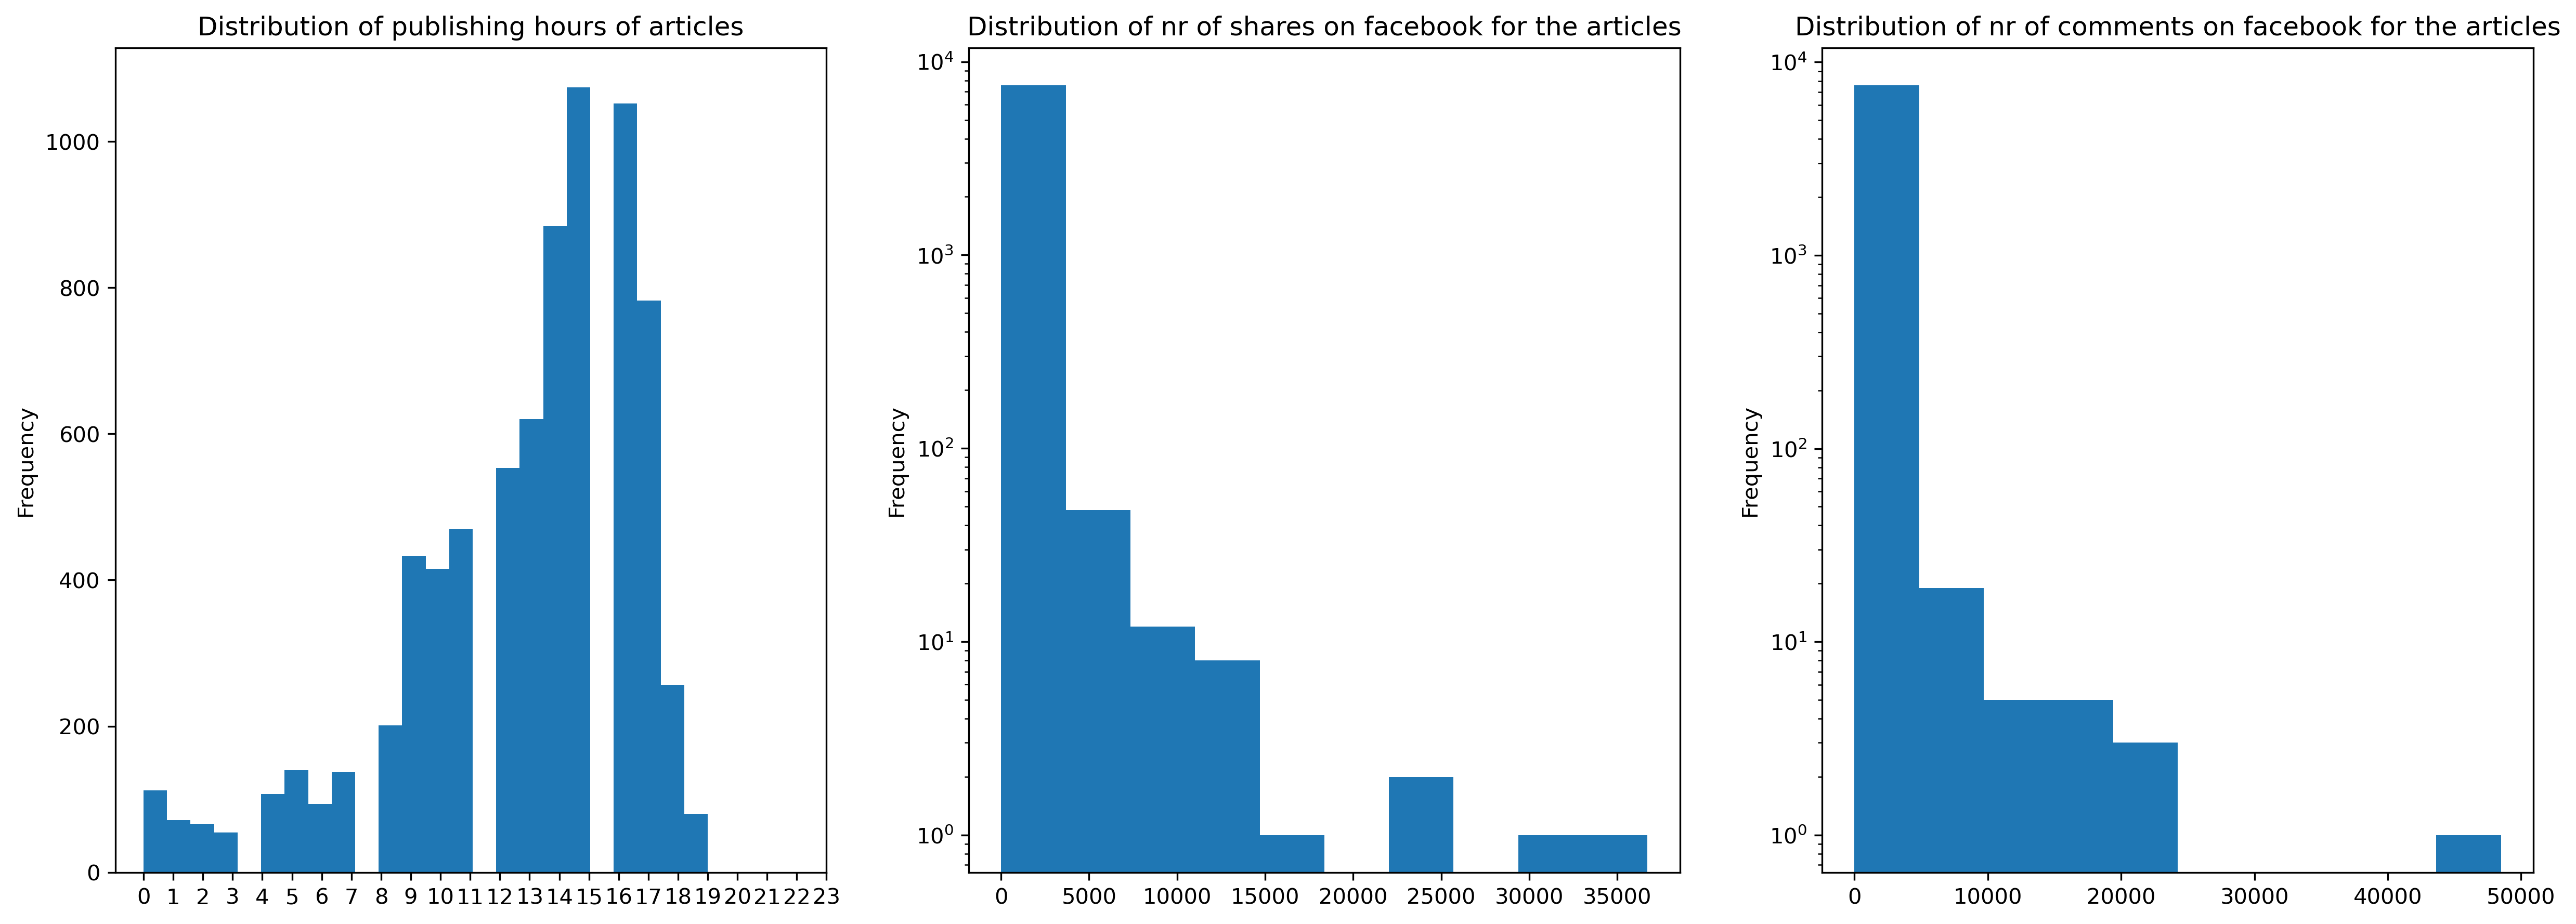

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(50,15),dpi=300)
pd.to_datetime(df.published_at).dt.hour.plot(kind="hist",
                                             xticks=np.arange(0,24,1),
                                             bins=24,
                                             xlabel="hour published",
                                             ylabel="Count",
                                             title="Distribution of publishing hours of articles",
                                             figsize=(15,7),
                                             ax=axes[0]);
df.engagement_share_count.plot(kind="hist",
                               logy=True,
                               xlabel="Nr of shares on facebook",
                               ylabel="Count",
                               title="Distribution of nr of shares on facebook for the articles",
                               figsize=(15,7),
                               ax=axes[1]);
df.engagement_comment_count.plot(kind="hist",
                               logy=True,
                               xlabel="Nr of comments on facebook",
                               ylabel="Count",
                               title="Distribution of nr of comments on facebook for the articles",
                               figsize=(20,7),
                               ax=axes[2]);


In [52]:
df['Time_stamp']=[x[:10] for x in df.published_at]

In [58]:
tid=pd.DataFrame(test)

In [65]:
tid.value_counts()

2019-09-10    644
2019-09-12    629
2019-09-05    617
2019-09-19    608
2019-09-03    602
2019-10-02    584
2019-09-06    579
2019-09-27    552
2019-10-01    537
2019-10-03    508
2019-09-09    466
2019-09-15    445
2019-09-07    418
2019-09-14    415
dtype: int64

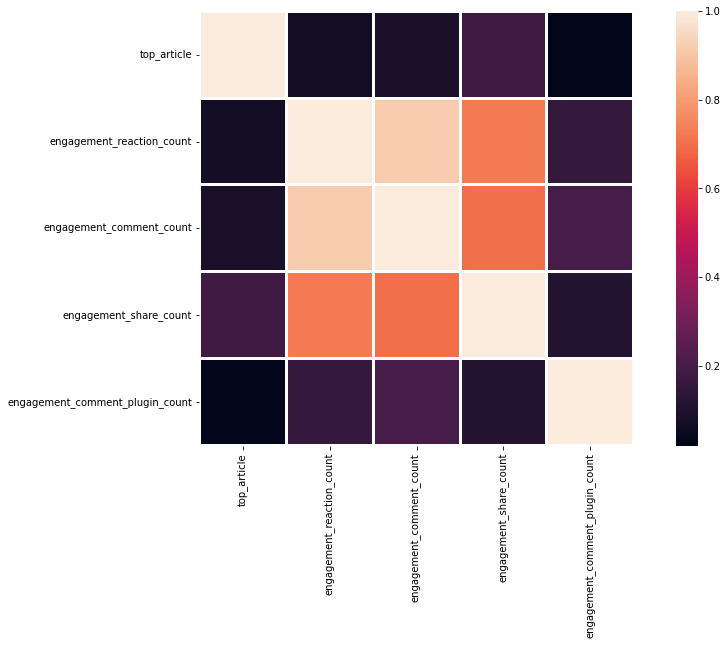

In [9]:
corr=df.corr()
plt.figure(figsize=(15,8))
ax1 = sns.heatmap(corr, linewidths=2, square=True, cmap='rocket')
plt.show()

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
text = df['content'].agg(lambda x: ' '.join(x.dropna())) 

In [12]:
from collections import Counter
Counter(" ".join(df["content"]).split()).most_common(100)

[('the', 14517),
 ('a', 8685),
 ('of', 8106),
 ('to', 7843),
 ('chars]', 7540),
 ('in', 6675),
 ('and', 5609),
 ('on', 4234),
 ('The', 3119),
 ('for', 2904),
 ('is', 2548),
 ('that', 2464),
 ('has', 2256),
 ('with', 1981),
 ('was', 1812),
 ('at', 1750),
 ('as', 1699),
 ('from', 1540),
 ('an', 1515),
 ('by', 1451),
 ('-', 1358),
 ('his', 1346),
 ('…', 1310),
 ('said', 1240),
 ('have', 1171),
 ('(Reuters)', 1163),
 ('are', 1134),
 ('its', 1123),
 ('it', 1100),
 ('after', 1048),
 ('he', 1010),
 ('been', 978),
 ('A', 976),
 ('be', 943),
 ('will', 876),
 ('who', 845),
 ('new', 727),
 ('this', 651),
 ('their', 647),
 ('President', 637),
 ('not', 609),
 ('more', 603),
 ('U.S.', 602),
 ('over', 583),
 ('her', 580),
 ('had', 573),
 ('were', 555),
 ('about', 555),
 ('Image', 554),
 ('than', 546),
 ('which', 535),
 ('one', 526),
 ('Trump', 526),
 ('but', 503),
 ('into', 500),
 ('up', 490),
 ('two', 489),
 ('they', 489),
 ('first', 477),
 ('would', 472),
 ('people', 466),
 ('In', 453),
 ('when', 4

## Scraping full article text

In [1]:
df_scrape = df.dropna(subset = ['source_id', 'source_name', 'author', 'title',
       'description', 'url', 'published_at',
       'top_article', 'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count'])

def url_scraper(url):
    try:
        html = requests.get(url).content
        soup = BeautifulSoup(html, features="html.parser")

        # kill all script and style elements
        for script in soup(["script", "style"]):
            script.extract()    # rip it out




        # get text
        text = soup.get_text()

        # break into lines and remove leading and trailing space on each
        lines = (line.strip() for line in text.splitlines())
        # break multi-headlines into a line each
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        # drop blank lines
        text = '\n'.join(chunk for chunk in chunks if chunk)
    except:
        text = "NA"
        print(url)
    return text

#Very slow function
# Limited by ca. 1.5 call pr sec 
df_scrape["contentX"] = df_scrape['url'].progress_apply(lambda x: url_scraper(x))

NameError: name 'df' is not defined

In [19]:
df.content[0]

'WASHINGTON (Reuters) - The National Transportation Safety Board said Tuesday a Tesla Model S was in Autopilot mode when it struck a fire truck in Culver City, California one of a series of crashes the board is investigating involving Tesla’s driver assistance… [+478 chars]'